<a href="https://colab.research.google.com/github/cibelerusso/MRASII/blob/main/C%C3%B3digos%20em%20Python/MLGs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos Lineares Generalizados


por **Cibele Russo**

**ICMC/USP - São Carlos SP**



## Programa

- Modelos lineares generalizados.

- Família exponencial de distribuições.

- O modelo de regressão logística

- A qualidade do ajuste.

- Aplicações (enfoque frequentista)




**Referências e Leituras sugeridas:**


- Paula, G. A. Modelos de regressão: com apoio computacional. São Paulo: IME-USP, 2013. Disponível em https://www.ime.usp.br/~giapaula/texto_2013.pdf

- Dobson, A. J.; Barnett, Adrian G. (2018). An introduction to generalized linear models. CRC press.

- https://www.statsmodels.org/devel/examples/notebooks/generated/glm.html


- https://docs.pymc.io/notebooks/GLM-poisson-regression.html


# Modelos lineares


**Objetivos**

Predizer $Y$ a partir do conhecimento de variáveis preditoras em $X = x$.


Um modelo linear considerando pares observados de $(X_i, Y_i), i=1,\ldots,n$, em que $X_i$ é um vetor de preditoras é dado por

$$\large{Y_i = X_i^\top\beta+\epsilon_i,}$$

em que, para o $i$-ésimo elemento amostral, temos

- $Y_i$ é a **variável resposta** (aleatória observável),

- $X_i$ contém **variáveis preditoras** (vetor conhecido, ou seja, não-aleatório),

- $\beta$ é um **vetor de parâmetros de interesse**, que queremos estimar,

- $\epsilon_i$ é o **erro aleatório** (não observável).


Suposições do modelo linear geral:

- $ E(Y_i) = \mu_i =  X_i^\top\beta$

- $\epsilon_i \stackrel{i.i.d}{\sim} N(0, \sigma^2)$

- Consequentemente $ Y_i|X_i \sim N(\mu_i, \sigma^2).$

O modelo linear (normal) é muito útil, mas nem sempre as suposições estão satisfeitas. É importante ter metodologias mais adequadas, em especial, para casos em que

- A variável resposta não possui distribuição Normal.

- A associação entre a resposta e as preditoras não é linear.



#  Modelo linear generalizado (MLG)

Nelder, John; Wedderburn, Robert (1972). Generalized Linear Models. Blackwell Publishing. Journal of the Royal Statistical Society. Series A (General). 135: 370–384. JSTOR 2344614. doi:10.2307/2344614

Os MLGs propõem a modelagem para variáveis na família exponencial de distribuições, que inclui

- Binomial (Bernoulli)
- Poisson
- Normal
- Binomial Negativa
- Gama
- Gaussiana Inversa
- outras



### A família exponencial de distribuições

Seja $Y_i$ uma variável aleatória cuja distribuição pode ser escrita na forma


$$\large f(y,\theta_i, \phi) = exp[\phi\{y \theta_i - b(\theta_i)\} + c(y, \phi)]$$


Dizemos que a distribuição de $Y_i$ pertence à família exponencial e escrevemos $$\large Y_i \sim FE(\mu_i, \phi),$$


em que $\mu_i = E(Y_i) = b'(\theta_i)$ é o parâmetro de posição e $\phi^{-1}$ o parâmetro de dispersão.


Além disso, $Var(Y_i) = \phi^{-1}V_i$ com $V_i = \displaystyle\frac{d\mu}{d\theta}$ a **função de variância**.



Então dizemos que um MLG é determinado pela **função de ligação**
$g(\mu_i) = \eta_i$ e pela **função de variância** $V(\mu)$.



Valores de $b$, $\theta$, $\phi$ e $V(\mu)$ para algumas distribuições são apresentados na tabela a seguir


<table>
  <tr>
    <th>Distribuição</th>
    <th>$b$</th>
    <th><center>$\theta$</center></th>
    <th><center>$\phi$</center></th>
    <th><center>$V(\mu)$</center></th>
  </tr>
      <tr>
      <th>Normal</th>
    <td> \begin{eqnarray}\theta^2/2\end{eqnarray}</td>
    <td> \begin{eqnarray}\mu\end{eqnarray} </td>
    <td> \begin{eqnarray}\sigma^{-2}\end{eqnarray}</td>
     <td> \begin{eqnarray}1\end{eqnarray}</td>
  </tr>
  <tr>
    <th>Poisson</th>
    <td> \begin{eqnarray}e^{\theta}\end{eqnarray}</td>
    <td> \begin{eqnarray}\log \mu\end{eqnarray} </td>
    <td> \begin{eqnarray}1\end{eqnarray} </td>
    <td> \begin{eqnarray}\mu\end{eqnarray} </td>
  </tr>      <tr>
    <th>Binomial</th>
    <td> \begin{eqnarray}\log\left(1+e^\theta\right)\end{eqnarray}</td>
    <td>\begin{eqnarray} \log\{\mu/(1-\mu)\}\end{eqnarray} </td>
    <td>\begin{eqnarray} n\end{eqnarray}</td>
      <td>\begin{eqnarray} \mu(1-\mu)\end{eqnarray}</td>
  </tr>
</table>

## Função de ligação

O modelo linear generalizado é definido por

$$\begin{array}{c}\large Y_i \sim FE(\mu_i, \phi) \\\large g(\mu_i) = \eta_i  = X_i^\top\beta\end{array}$$

em que

- $ \eta_i = X_i^\top\beta$ é o **preditor linear**,

- $\beta = (\beta_0, \beta_1,\ldots, \beta_p)^\top$, $p<n$ é um vetor de parâmetros desconhecidos (coeficientes da regressão),

- $ X_i = (1, X_{i1},\ldots, X_{ip})^\top$ representa os valores de $p$ variáveis preditoras e

- $g(\mu_i)$ é a **função de ligação**, uma função monótona e diferenciável.






### Exemplos


#### Modelo Normal

Se $Y\sim N(\mu, \sigma^2)$, com densidade

$$\begin{array}{lll}f(y) &=& \displaystyle\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{1}{2\sigma^2}(y-\mu)^2\right\} = \\ &=&\displaystyle\exp\left[ \left\{ \frac{1}{\sigma^2}\left( \mu y - \frac{\mu^2}{2}\right)  \right\}- \frac{1}{2} \left\{ \log 2 \pi \sigma^2 + \frac{y^2}{\sigma^2}\right\}\right],\end{array}$$

em que $-\infty < \mu < \infty$ e $\sigma^2>0$.

Logo, $\theta = \mu$, $b(\theta) = \theta^2/2 $, $\phi=\sigma^{-2}$ e $c(y, \phi) = \frac{1}{2} \log(\phi/2\pi) - \phi y^2/2$. Verifica-se que $V(\mu) = 1$.



#### Modelo Poisson: para dados de contagem

Se $Y\sim P(\mu)$, com densidade dada por

$$ f(y) =P(Y=y) =   \displaystyle\frac{e^{-\mu} \mu^y}{y!} = exp(y \log\mu -\mu -\log y!), $$

em que $\mu>0$ e $y=0,1,...$

Assim $\theta = \log\mu$, $b(\theta) = e^\theta$, $\phi=1$ e $c(y, \phi) = -\log y!$. Segue que $V(\mu) = \mu$.



#### Modelo Binomial: para modelar proporções


Se $Y^\star$ é a proporção de sucessos em $n$ ensaios independentes de Bernoulli, cada um com probabilidade de sucesso $\mu$, então $nY^\star\sim B(n,\mu)$, com densidade dada por

$$\begin{array}{lll}f(y)  &=& P(Y=y) = \left(\begin{array}{c} n\\ ny^\star\end{array}\right)\mu ^{ny^\star}(1-\mu)^{n-ny^\star} = \\ &=&\exp\left\{\log  \left(\begin{array}{c} n\\ ny^\star\end{array}\right) + ny^\star \log\left(\displaystyle\frac{\mu}{1-\mu} + n\log(1-\mu)\right)\right\},\end{array}  $$

em que $\mu>0$, $y^\star<1$. Nesse caso, $\phi =n$, $\theta = \log\displaystyle\left(\frac{\mu}{1-\mu}\right)$, $b(\theta) = \log(1+e^\theta)$, e $c(y^\star, \phi) = \log  \left(\begin{array}{c} \phi\\ \phi y^\star\end{array}\right)$. Segue que $V(\mu) = \mu(1-\mu)$.




### Função de ligação canônica

Se $\theta_i = \eta_i = X_i^\top\beta$, então $\eta$ é chamada de **ligação canônica**.

- No modelo **normal**, a ligação canônica é $\eta = \mu $

- No modelo **Poisson**, a ligação canônica é $\eta = \log\mu$

- No modelo **binomial**, a ligação canônica é $\eta = \log\displaystyle\left\{\frac{\mu}{1-\mu}\right\}$



## O modelo de regressão logística

Um dos modelos lineares mais utilizados é o modelo de regressão logística.

Neste modelo, consideramos


$Y_i = \left\{\begin{array}{l}1, \mbox{ se o indivíduo i possui determinada característica}\\ 0, \mbox{ caso contrário}\end{array}\right.$

Supondo que $P(Y_i|X_i) = \pi(X_i)$ e que

$$\log\left\{\displaystyle\frac{\pi(x)}{1-\pi(x)}\right\} = \alpha+\beta x$$

e queremos estimar os parâmetros $\alpha$ e $\beta$ para compreender como $X_i$ e $Y_i$ estão associados.



Suponha que $X_i=1$ indique que o indivíduo $i$ possui um fator de risco para uma determinada doença (indicada por $Y_i=1)$ e foram observados $n_1$ indivíduos com a presença deste fator, e $n_2$ indivíduos sem a presença deste fator ($X_i=0$).


Para os indivíduos que possuiam o fator, a **chance** de desenvolvimento da doença fica

$$\displaystyle\frac{\pi(1)}{1-\pi(1)} = e^{\alpha + \beta},$$

enquanto que a **chance** de desenvolvimento da doença no indivíduo com ausência do fator é

$$\displaystyle\frac{\pi(0)}{1-\pi(0)} = e^{\alpha }.$$


A razão de chances nesse caso fica

$$\psi =  \displaystyle\frac{\pi(1)/(1-\pi(1))}{\pi(0)/(1-\pi(0))} = e^\beta.$$



### Regressão logística múltipla


O modelo de regressão logística pode ser estendido para incluir $p$ variáveis preditoras:

$Y_i = \left\{\begin{array}{l}1, \mbox{ se o indivíduo i possui determinada característica}\\ 0, \mbox{ caso contrário}\end{array}\right.$

Supondo que $P(Y_i|X_i) = \pi(X_i)$ e que

$$\log\left\{\displaystyle\frac{\pi(x)}{1-\pi(x)}\right\} = \beta_0 + \beta_1 x_{1} + \beta_2 x_{2} + \ldots + \beta_p x_{p}.$$


## A estimação dos parâmetros

No **enfoque clássico**, é comum obter os **estimadores de máxima verossimilhança** por métodos iterativos como

- Método de Newton-Raphson

- Método escore de Fisher

- Método dos mínimos quadrados ou mínimos quadrados reponderados


No **enfoque Bayesiano**, supomos distribuições de probabilidade para os coeficientes da regressão com métodos computacionais e obtemos estimativas a partir de amostras da distribuição a posteriori dos parâmetros, como Monte Carlo Hamiltoniano ou No U-Turn Sampler (NUTS).

# A qualidade do ajuste


A qualidade do ajuste pode ser avaliada com

**Análise de diagnóstico**
- Resíduos ordinários,
- Resíduos studentizados,
- Pontos de alavanca,
- Distância de Cook
- Envelopes para os resíduos (disponível em R por https://www.ime.usp.br/~giapaula)
- Deviance (função desvio, para mais informações ver https://www.ime.usp.br/~giapaula/texto_2013.pdf)
- Resíduo componente do desvio

**Métricas de ajuste**
- Erro absoluto médio
- Erro quadrático médio
- Raiz do erro quadrático médio


**Seleção de modelos**
- Método forward
- Método backward
- Método stepwise
- Critérios de informação (AIC, BIC)


# Modelos Lineares generalizados

In [1]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

## MLG: Dados com resposta binomial

Referência sugerida: https://www.statsmodels.org/devel/examples/notebooks/generated/glm.html


## Aplicação

Considere os dados do arquivo amostra_banco.csv. Estão disponíveis as variáveis:

- Cliente: Identificador do cliente.
- Sexo: Feminino (F) ou Masculino (M)
- Idade: Idade do cliente, em anos completos.
- Empresa: Tipo da empresa em que trabalha: Pública, Privada ou Autônomo
- Salário: Salário declarado pelo cliente na abertura da conta, em reais.
- Saldo_cc: Saldo em conta corrente, em reais.
- Saldo_poupança: Saldo em poupança, em reais.
- Saldo_investimento: Saldo em investimentos, em reais.
- Devedor_cartao: Valor em atraso no cartão de crédito, em reais.
- Inadimplente: Se o cliente é considerado inadimplente atualmente (1) ou não (0), de acordo com critérios preestabelecidos.

In [3]:
import pandas as pd

# Dados banco - Leitura dos dados
dados = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Modelos-de-Regressao/refs/heads/master/Regress%C3%A3o%20Log%C3%ADstica/amostra_banco.csv', index_col=0, decimal='.')


# Vamos trabalhar com uma amostra como na Aula 6
#dados = dados.sample(n=200, replace=False, random_state=10)


dados.head(30)

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
33227,33227,M,38,Privada,6467,993.18,0.00,0.00,2038.32,1
64805,64805,M,33,Privada,5764,1167.27,0.00,0.00,4617.05,1
39764,39764,F,35,Privada,5417,667.30,0.00,0.00,5726.83,1
51271,51271,M,36,Privada,5858,846.53,0.00,0.00,1723.74,1
9699,9699,M,32,Privada,5579,768.90,16801.57,8138.71,0.00,0
5949,5949,F,26,Autônomo,4849,730.19,0.00,0.00,1573.82,0
27956,27956,F,27,Privada,5188,781.84,0.00,0.00,2613.17,1
55002,55002,F,30,Privada,5035,862.34,0.00,0.00,1699.97,1
50876,50876,F,32,Pública,5414,702.49,0.00,0.00,2177.12,0
47756,47756,M,30,Pública,5324,522.20,0.00,0.00,562.40,0


**Divisão da base em treino e teste**

In [4]:
dados_treino, dados_teste = train_test_split(dados,train_size = 0.8,random_state=3)

In [5]:
dados['Devedor_cartao']

,Devedor_cartao
33227,2038.32
64805,4617.05
39764,5726.83
51271,1723.74
9699,0.00
...,...
21466,1976.27
23128,4553.96
67012,3865.27
5247,4580.22


### Ajustando um MLG com resposta binária

In [6]:
### Ajustando um MLG com resposta binária, iniciando com 4 preditoras

preditoras = dados_treino[['Idade','Saldo_cc','Salario', 'Devedor_cartao']]
resposta = dados_treino['Inadimplente']


In [7]:
preditoras

,Idade,Saldo_cc,Salario,Devedor_cartao
28382,31,612.35,5493,3758.30
62264,32,937.46,5462,1862.07
71578,27,883.61,4985,3161.33
12529,38,718.82,6067,4688.03
21115,31,646.01,5631,5137.07
...,...,...,...,...
68287,29,754.88,5136,730.14
89521,31,810.41,5150,3356.15
10061,32,894.14,5546,707.72
13148,34,974.33,5712,3262.28


In [8]:
import statsmodels.api as sm

In [9]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           Inadimplente   No. Observations:                  400
Model:                            GLM   Df Residuals:                      396
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -216.83
Date:                Wed, 10 Sep 2025   Deviance:                       433.66
Time:                        22:56:25   Pearson chi2:                     396.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02346
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Idade              0.1250      0.077      1.

In [10]:
np.exp(-0.0011)

np.float64(0.9989006047782276)

In [11]:
np.exp(0.125)

np.float64(1.1331484530668263)

In [12]:
np.exp(0.0002)

np.float64(1.0002000200013335)

In [13]:
ajustado = res.predict(preditoras)


In [14]:
ajustado

,0
28382,0.248694
62264,0.233008
71578,0.255071
12529,0.347018
21115,0.273457
...,...
68287,0.182500
89521,0.323120
10061,0.179476
13148,0.283218


In [15]:
X_teste = dados_teste[['Idade','Saldo_cc','Salario', 'Devedor_cartao']]
Y_teste = dados_teste[['Inadimplente']]

predito = res.predict(X_teste)


In [16]:
predito

,0
29009,0.139964
92796,0.265813
64396,0.300898
72122,0.193688
51301,0.248164
...,...
65339,0.207873
16779,0.191530
83876,0.268329
88703,0.106881


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(predito, Y_teste)


0.18267841277106822

In [18]:
res.aic

np.float64(441.66098261590025)

**Segundo modelo, excluindo Saldo_cc**

In [19]:
preditoras = dados_treino[['Idade','Devedor_cartao','Salario']]
resposta = dados_treino[['Inadimplente']]

In [20]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Inadimplente   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -217.04
Date:                Wed, 10 Sep 2025   Deviance:                       434.09
Time:                        22:56:28   Pearson chi2:                     396.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02241
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Idade              0.1268      0.077      1.

In [21]:
ajustado = res.predict()

In [22]:
X_teste = dados_teste[['Idade','Devedor_cartao','Salario']]
Y_teste = dados_teste[['Inadimplente']]

predito = res.predict(X_teste)


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(predito, Y_teste)

0.18226773206050872

In [24]:
res.aic

np.float64(440.08925347183964)

In [25]:
dados_treino.loc[:,'const']  = 1

In [26]:
dados_treino

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente,const
28382,28382,F,31,Privada,5493,612.35,0.0,0.0,3758.30,0,1
62264,62264,F,32,Privada,5462,937.46,0.0,0.0,1862.07,1,1
71578,71578,F,27,Pública,4985,883.61,0.0,0.0,3161.33,0,1
12529,12529,M,38,Privada,6067,718.82,0.0,0.0,4688.03,1,1
21115,21115,M,31,Privada,5631,646.01,0.0,0.0,5137.07,0,1
...,...,...,...,...,...,...,...,...,...,...,...
68287,68287,F,29,Privada,5136,754.88,0.0,0.0,730.14,0,1
89521,89521,F,31,Privada,5150,810.41,0.0,0.0,3356.15,1,1
10061,10061,M,32,Privada,5546,894.14,0.0,0.0,707.72,0,1
13148,13148,M,34,Privada,5712,974.33,0.0,0.0,3262.28,0,1


In [27]:
dados_treino.head()

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente,const
28382,28382,F,31,Privada,5493,612.35,0.0,0.0,3758.30,0,1
62264,62264,F,32,Privada,5462,937.46,0.0,0.0,1862.07,1,1
71578,71578,F,27,Pública,4985,883.61,0.0,0.0,3161.33,0,1
12529,12529,M,38,Privada,6067,718.82,0.0,0.0,4688.03,1,1
21115,21115,M,31,Privada,5631,646.01,0.0,0.0,5137.07,0,1


In [28]:
preditoras = dados_treino[['const','Idade','Devedor_cartao', 'Salario']]
resposta = dados_treino[['Inadimplente']]


In [29]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Inadimplente   No. Observations:                  400
Model:                            GLM   Df Residuals:                      396
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -216.80
Date:                Wed, 10 Sep 2025   Deviance:                       433.61
Time:                        22:56:31   Pearson chi2:                     396.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02358
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.0619      1.517     -0.

In [30]:
res.aic

np.float64(441.60871156385406)

**Análise de diagnóstico para o segundo modelo, agora com a base toda**

In [31]:
preditoras = dados[['Idade', 'Devedor_cartao', 'Salario']]
resposta = dados[['Inadimplente']]

In [32]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
ajustado = res.predict()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Inadimplente   No. Observations:                  500
Model:                            GLM   Df Residuals:                      497
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -271.47
Date:                Wed, 10 Sep 2025   Deviance:                       542.93
Time:                        22:56:33   Pearson chi2:                     493.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02067
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Idade              0.0725      0.068      1.

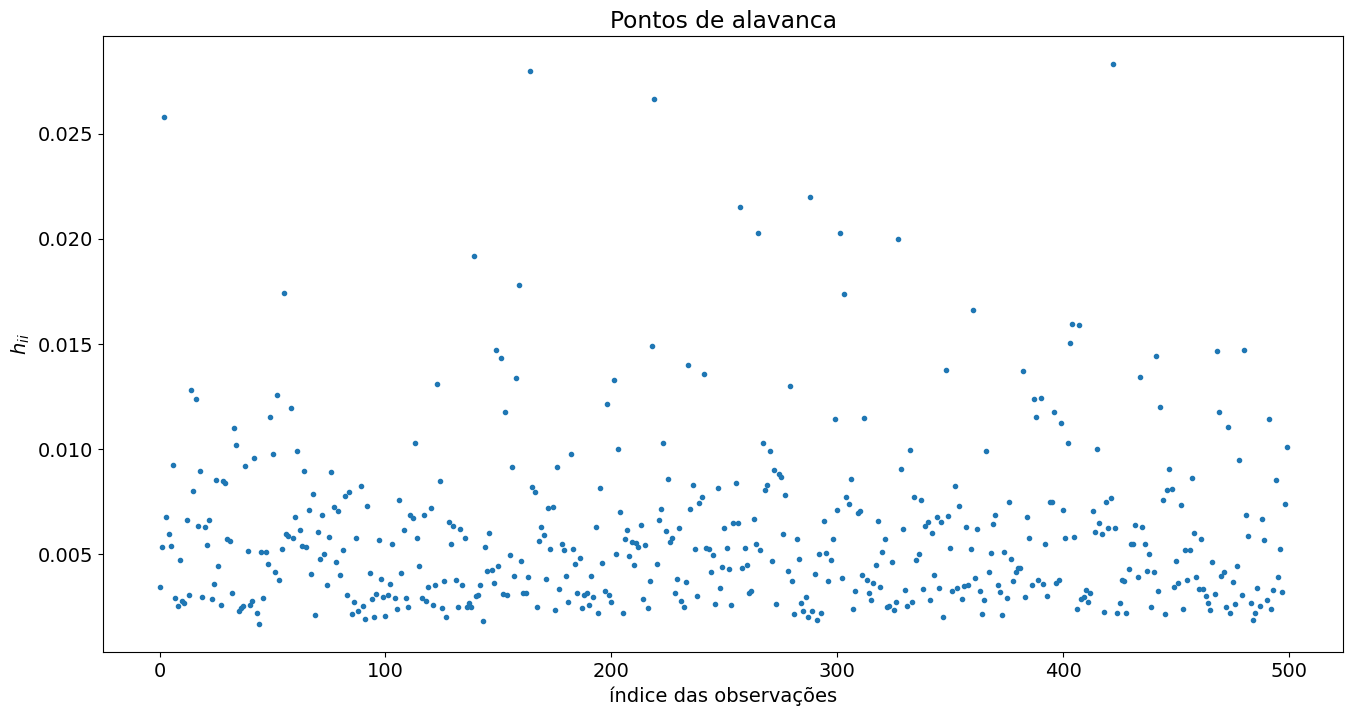

In [33]:
# Gráfico de pontos de alavanca

fig, ax = plt.subplots()

plt.plot(res.get_hat_matrix_diag(), '.')

ax.set_title('Pontos de alavanca')
ax.set_ylabel('$h_{ii}$')
ax.set_xlabel('índice das observações');

plt.show()


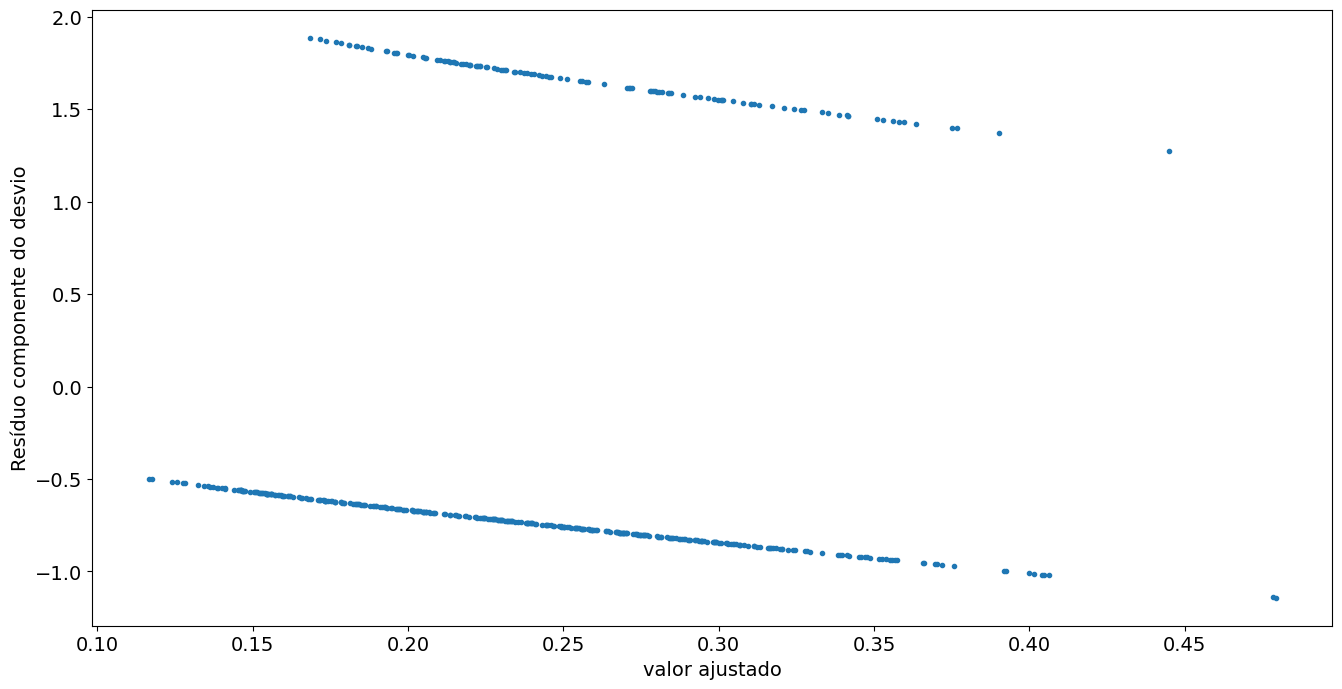

In [34]:
# Gráfico de Resíduo Componente do desvio

fig, ax = plt.subplots()
plt.plot(ajustado,res.resid_deviance,  '.')


ax.set_ylabel('Resíduo componente do desvio')
ax.set_xlabel('valor ajustado');

plt.show()


In [35]:
# x and y given as DataFrame columns
import plotly.express as px

fig = px.scatter(x = ajustado, y=res.resid_deviance)
fig.show()